In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-26-2020.csv')

In [5]:
print(df.head())
df.info()

   Province_State Country_Region          Last_Update      Lat     Long_  \
0         Alabama             US  2020-07-27 04:35:15  32.3182  -86.9023   
1          Alaska             US  2020-07-27 04:35:15  61.3707 -152.4044   
2  American Samoa             US  2020-07-27 04:35:15 -14.2710 -170.1320   
3         Arizona             US  2020-07-27 04:35:15  33.7298 -111.4312   
4        Arkansas             US  2020-07-27 04:35:15  34.9697  -92.3731   

   Confirmed  Deaths  Recovered    Active  FIPS  Incident_Rate  People_Tested  \
0      79294    1473    32510.0   45311.0     1    1617.193722       649686.0   
1       2525      20      817.0    1688.0     2     345.159901       207264.0   
2          0       0        NaN       0.0    60       0.000000         1037.0   
3     162014    3305    20978.0  137731.0     4    2225.859310       867103.0   
4      38623     401    31622.0    6600.0     5    1279.837922       477267.0   

   People_Hospitalized  Mortality_Rate       UID ISO3  T

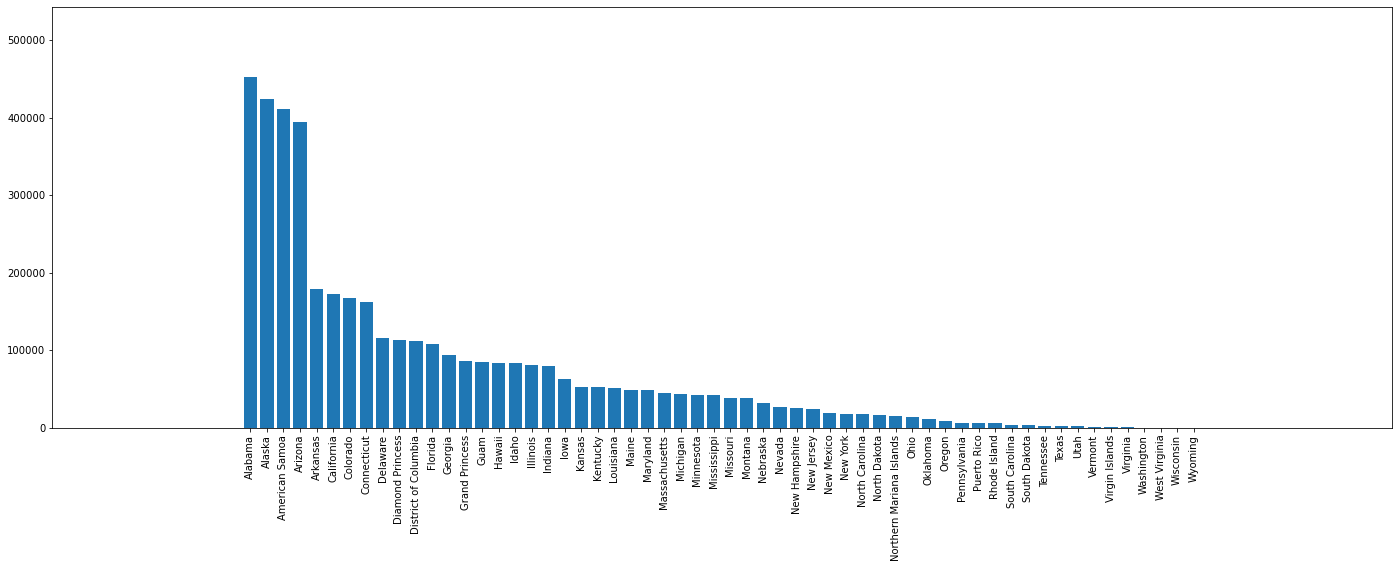

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 8))

plt.bar(x=df['Province_State'], height=df['Confirmed'].sort_values(ascending=False))

# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(df['Province_State'], df['Province_State'], rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)